In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_excel('ped_delay.xlsx', sheet_name='Sheet5')
df.head()

,scenario,route,speed,delay
0,existing,A-B,3.5,152.0
1,existing,B-A,3.5,146.6
2,existing,C-D,3.5,150.4
3,existing,D-C,3.5,154.4
4,existing,A-B,4.0,154.1


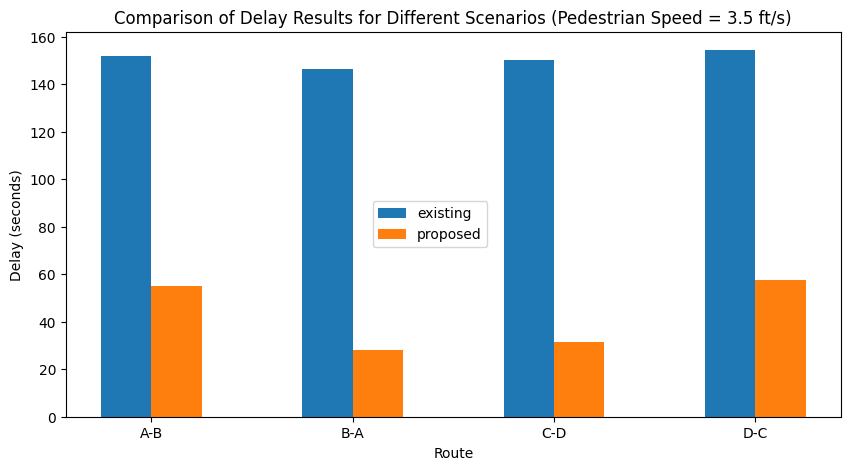

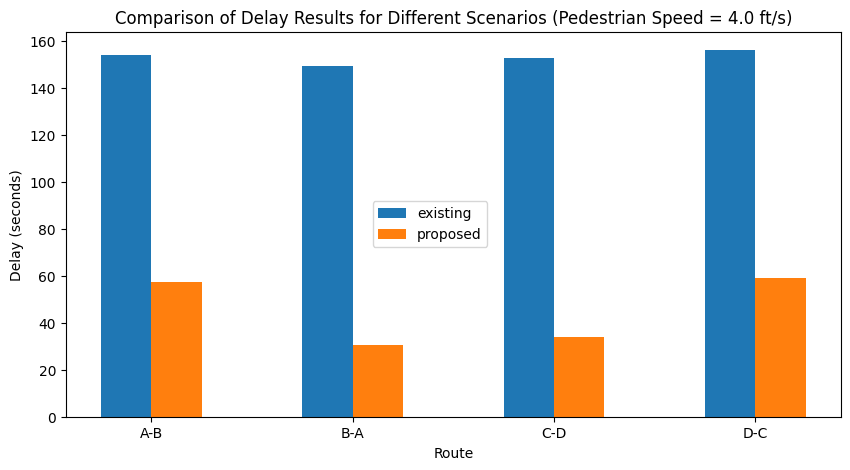

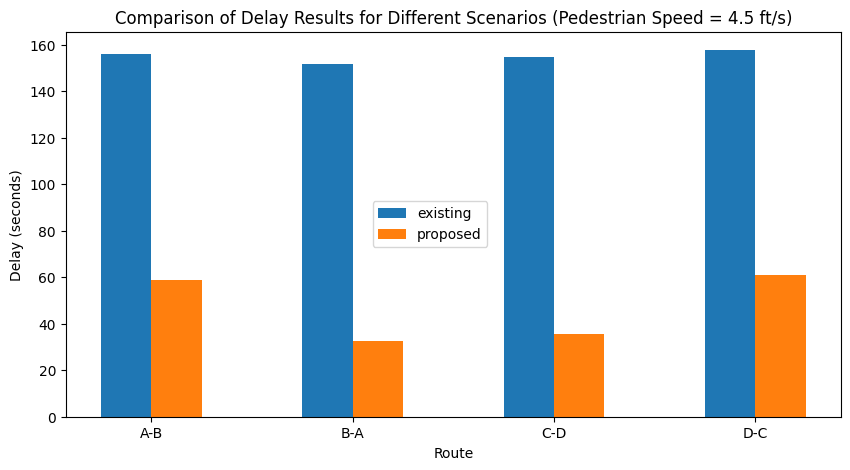

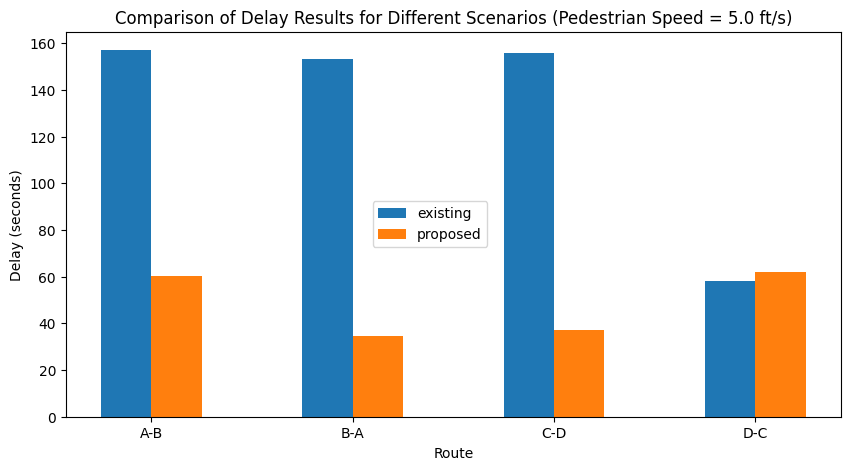

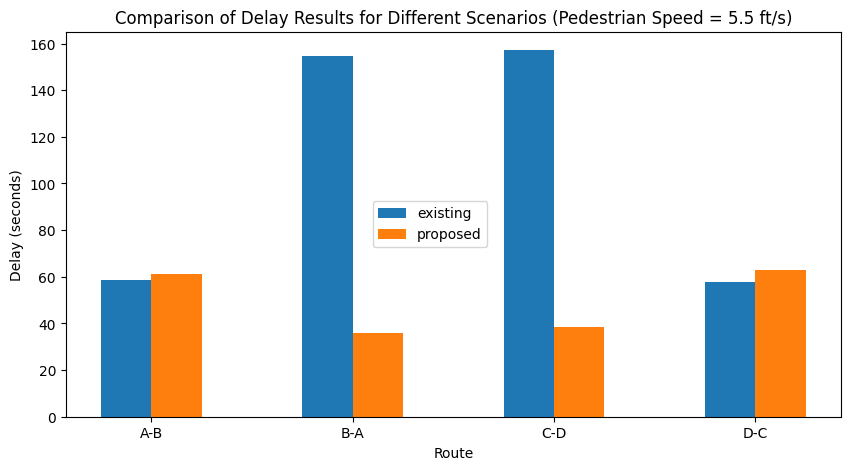

In [ ]:
def plot_delay_comparison(df, speed_value, scenario_labels=['existing', 'proposed']):
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.25
    routes = df['route'].unique()

    for i, scenario in enumerate(scenario_labels):
        speed = speed_value  # Only one speed value
        data = df[(df['scenario'] == scenario) & (df['speed'] == speed)]

        x_values = [routes.tolist().index(route) +
                    (i - (len(scenario_labels) - 1) / 2) * bar_width
                    for route in routes]

        ax.bar(x_values, data['delay'], width=bar_width, label=f'{scenario}')

    ax.set_xticks(range(len(routes)))
    ax.set_xticklabels(routes)

    ax.set_xlabel('Route')
    ax.set_ylabel('Delay (seconds)')
    ax.set_title(f'Comparison of Delay Results for Different Scenarios (Pedestrian Speed = {speed} ft/s)')
    ax.legend(loc='center', bbox_to_anchor=(0.47, 0.5))
    plt.show()

speed_values = df['speed'].unique()

for speed_value in speed_values:
    plot_delay_comparison(df, speed_value)

In [ ]:
def plot_delay_vs_speed(df, route):
    fig, ax = plt.subplots(figsize=(10, 5))

    scenario_labels = ['existing', 'proposed']
    markers = ['o', 's']  # Define markers for each scenario

    for i, scenario in enumerate(scenario_labels):
        data = df[(df['scenario'] == scenario) & (df['route'] == route)]
        ax.plot(data['speed'], data['delay'], marker=markers[i], label=scenario)

    ax.set_xlabel('Speed (ft/s)')
    ax.set_ylabel('Delay (seconds)')
    ax.set_title(f'Delay vs Speed for Route: {route}')
    ax.legend()
    plt.show()

# Example usage:
routes = df['route'].unique()
for route in routes:
    plot_delay_vs_speed(df, route)